<a href="https://colab.research.google.com/github/mafaldasalomao/multilabel_coffee_leaf/blob/main/multilabel_leaf_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#Import suppporting libraries
import tarfile
import urllib.request as urllib2
import os
import cv2
from os import listdir
from os.path import isfile, join
import re
#Import deep learning libraries
import cv2
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import tqdm as tqdm
import tensorflow_hub as hub

#Import data analytics libraries
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
import scipy.io
import pandas as pd
import seaborn as sns
#Import image visualization libraries
from PIL import *
from PIL import ImageFile
from PIL import Image
#System settings
ImageFile.LOAD_TRUNCATED_IMAGES = True
os.environ['WANDB_CONSOLE'] = 'off'
#Coloring for print outputs
class color:
   RED = '\033[91m'
   BOLD = '\033[1m'
   END = '\033[0m'

In [ ]:
!nvidia-smi

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp -r  /content/drive/MyDrive/Pesquisas/dataset_original/ /content/

In [ ]:
path='/content/dataset_original'


In [ ]:
def criar_diretorio(caminho):
  if not os.path.exists(caminho):
    os.makedirs(caminho)

In [ ]:
criar_diretorio("/content/dataset")

In [ ]:
IMG_SIZE = 224 # Specify height and width of image to match the input format of the model
CHANNELS = 1

In [ ]:
def plot_curves(history, title):
    fig_1 = plt.figure(figsize=(5, 3))
    epochs = range(1, len(history.history['loss'])+1)
    plt.plot(epochs, history.history['loss'], label="Train loss")
    plt.plot(epochs, history.history['val_loss'], label="Test Loss")
    plt.title("Training Loss Curve: "+title)
    plt.ylabel("Loss")
    plt.xlabel("Epochs")
    plt.legend();
    #fig_1.savefig(path_imgs_train+'/loss_'+title+'.png')
    #plt.close(fig_1)
    
    fig_2 = plt.figure(figsize=(5, 3))
    epochs = range(1, len(history.history['accuracy'])+1)
    plt.plot(epochs, history.history['accuracy'], label="Train Acc")
    plt.plot(epochs, history.history['val_accuracy'], label="Test Acc")
    plt.title("Training Accuracy Curve: "+title)
    plt.ylabel("Accuracy")
    plt.xlabel("Epochs")
    plt.legend();
    #fig_2.savefig(path_imgs_train+'/acc_'+title+'.png')
    #plt.close(fig_2)

In [3]:
cerscospora = '/content/dataset_original/dataset_original/Cerscospora'
healthy = '/content/dataset_original/dataset_original/Healthy'
leaf_rust = '/content/dataset_original/dataset_original/Leaf rust'
miner = '/content/dataset_original/dataset_original/Miner'
phoma = '/content/dataset_original/dataset_original/Phoma'
folders = [healthy, leaf_rust, miner, cerscospora, phoma]
folders

['/content/dataset_original/dataset_original/Healthy',
 '/content/dataset_original/dataset_original/Leaf rust',
 '/content/dataset_original/dataset_original/Miner',
 '/content/dataset_original/dataset_original/Cerscospora',
 '/content/dataset_original/dataset_original/Phoma']

In [ ]:
def create_mydataset():
  X_train, y_train = [], []
  for idx, foldername in enumerate(folders):
    for filename in os.listdir(foldername):
      out = '/content/dataset/{}.png'.format(filename.split('.')[0])
      image = cv2.imread(foldername+'/'+filename)
      cv2.imwrite(out,cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))
      img = tf.keras.utils.load_img(out, target_size = (224, 224, 1),color_mode="grayscale")
      img = tf.keras.utils.img_to_array(img)
      img= img/255.
      X_train.append(img)
      vec = np.zeros(4)
      vec[idx] = 1
      y_train.append(vec)
  X = np.array(X_train)
  y = np.array(y_train)
  return X, y

In [ ]:
'''
def create_mydataset():
    X_train, y_train = [], []
    for filename in os.listdir(healthy):
      out = '/content/dataset/{}.png'.format(filename.split('.')[0])
      image = cv2.imread(healthy+'/'+filename)
      cv2.imwrite(out,cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))
      img = tf.keras.utils.load_img(out, target_size = (224, 224, 1),color_mode="grayscale")
      img = tf.keras.utils.img_to_array(img)
      img= img/255.
      X_train.append(img)
      y_train.append([1, 0, 0, 0, 0])
    for filename in os.listdir(leaf_rust):
      out = '/content/dataset/{}.png'.format(filename.split('.')[0])
      image = cv2.imread(leaf_rust+'/'+filename)
      cv2.imwrite(out,cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))
      img = tf.keras.utils.load_img(out, target_size = (224, 224, 1),color_mode="grayscale")
      img = tf.keras.utils.img_to_array(img)
      img= img/255.
      X_train.append(img)
      y_train.append([0, 1, 0, 0, 0])
    for filename in os.listdir(miner):
      out = '/content/dataset/{}.png'.format(filename.split('.')[0])
      image = cv2.imread(miner+'/'+filename)
      cv2.imwrite(out,cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))
      img = tf.keras.utils.load_img(out, target_size = (224, 224, 1),color_mode="grayscale")
      img = tf.keras.utils.img_to_array(img)
      img= img/255.
      X_train.append(img)
      y_train.append([0, 0, 1, 0, 0])
    for filename in os.listdir(cerscospora):
      out = '/content/dataset/{}.png'.format(filename.split('.')[0])
      image = cv2.imread(cerscospora+'/'+filename)
      cv2.imwrite(out,cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))
      img = tf.keras.utils.load_img(out, target_size = (224, 224, 1),color_mode="grayscale")
      img = tf.keras.utils.img_to_array(img)
      img= img/255.
      X_train.append(img)
      y_train.append([0, 0, 0, 1, 0])
    for filename in os.listdir(phoma):
      out = '/content/dataset/{}.png'.format(filename.split('.')[0])
      image = cv2.imread(phoma+'/'+filename)
      cv2.imwrite(out,cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))
      img = tf.keras.utils.load_img(out, target_size = (224, 224, 1),color_mode="grayscale")
      img = tf.keras.utils.img_to_array(img)
      img= img/255.
      X_train.append(img)
      y_train.append([0, 0, 0, 0, 1])
    X = np.array(X_train)
    y = np.array(y_train)
    return X, y
    '''

In [ ]:
#X, y = create_dataset_aug()
X, y = create_mydataset()
#((1225, 224, 224, 3), (1225, 5))
num_folds=5
# Define the K-fold Cross Validator
#kfold = KFold(n_splits=num_folds, shuffle=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20, test_size=0.2, shuffle=True)
del X
del y


In [ ]:
X_train.shape, y_train.shape

((16, 224, 224, 1), (16, 4))

In [ ]:
def residual_block(inputs):
  residual = tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1)(inputs)
  residual = tf.keras.layers.BatchNormalization()(residual)
  residual = tf.keras.layers.ReLU()(residual)
  #residual = tf.keras.layers.MaxPool2D(4)(residual)
  residual = tf.keras.layers.Conv2D(filters=128, kernel_size=3, strides=1)(residual)
  residual = tf.keras.layers.BatchNormalization()(residual)
  residual = tf.keras.layers.ReLU()(residual)
  #residual = tf.keras.layers.MaxPool2D(4)(residual)

  residual = tf.keras.layers.Flatten()(residual) # ------------------------------------------------------------ COMENTA AQUI
  #residual = tf.keras.layers.Dense(128, activation='relu')(residual)
  residual = tf.keras.layers.Dense(64, activation='relu')(residual)
  residual = tf.keras.layers.Dense(32, activation='relu')(residual)
  return residual
def Model_3():
  inputs = tf.keras.layers.Input(shape=(224, 224, 1))
  x = tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=1)(inputs)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.ReLU()(x)
  x = tf.keras.layers.MaxPool2D(4)(x)

  x = tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=1)(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.ReLU()(x)
  x = tf.keras.layers.MaxPool2D(4)(x)

  residual = residual_block(x)
  #residual = residual_block(residual)

  #x = tf.keras.layers.Flatten()(residual)
  x = tf.keras.layers.Dense(16, activation='relu')(residual)
  x = tf.keras.layers.Dense(8, activation='relu')(x)
  x = tf.keras.layers.Dense(5, activation='sigmoid')(x)

  #x = tf.keras.layers.add([x, residual]) #------------- bloco residual nas camadas densas
  model = tf.keras.Model(inputs=inputs, outputs=x)

  return model

In [ ]:
model_all_0 = Model_3()

In [ ]:
N_LABELS = 5
EPOCHS = 30
LR = 1e-4
batch_size = 32
# Compile the model

model_all_0.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=LR),
  loss='binary_crossentropy',
  metrics=['accuracy'])

history = model_all_0.fit(X_train, y_train,
            batch_size=batch_size,
            epochs=EPOCHS,
            validation_data=(X_test, y_test))

In [ ]:
del X_train
del y_train

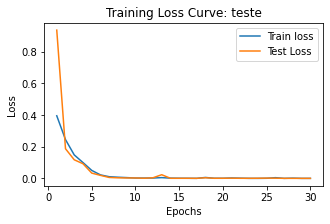

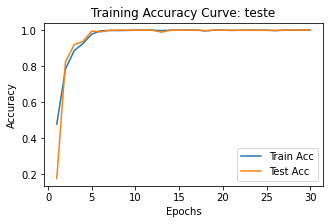

In [ ]:
plot_curves(history, "teste")

In [ ]:
## teste

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

def plot_results(y_test, preds):
  miner_list_preds = []
  cerscospora_list_preds = []
  Healthy_preds = []
  leaf_rust_preds = []
  phoma_list_preds = []
  miner_list= []
  cerscospora_list = []
  Healthy_list = []
  leaf_rust_list = []
  phoma_list = []
  for i in range(len(preds)):
    Healthy_preds.append(preds[i][0])
    leaf_rust_preds.append(preds[i][1])
    miner_list_preds.append(preds[i][2])
    cerscospora_list_preds.append(preds[i][3])
    phoma_list_preds.append(preds[i][4])
    Healthy_list.append(y_test[i][0])
    leaf_rust_list.append(y_test[i][1])
    miner_list.append(y_test[i][2])
    cerscospora_list.append(y_test[i][3])
    phoma_list.append(y_test[i][4])
  acc_aline = accuracy_score(Healthy_list, Healthy_preds)
  print('The accuracy for Healthy: ', acc_aline)
  acc_bline = accuracy_score(leaf_rust_list, leaf_rust_preds)
  print('The accuracy for leaf_rust: ', acc_bline)
  acc_effusion = accuracy_score(miner_list, miner_list_preds)
  print('The accuracy for miner: ', acc_effusion)
  acc_consolid = accuracy_score(cerscospora_list, cerscospora_list_preds)
  print('The accuracy for cerscospora: ', acc_consolid)
  acc_pli = accuracy_score(phoma_list, phoma_list_preds)
  print('The accuracy for phoma: ', acc_pli)
  
  # Plot confusion matrix for A-Line
  matriz_aline = confusion_matrix(Healthy_list, Healthy_preds)
  ax1 = plt.axes()
  sns.heatmap(matriz_aline, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
  ax1.set_title('Healthy')
  plt.xlabel('Prediction')
  plt.ylabel('Ground truth')
  plt.show()
  
  # 
  # Plot confusion matrix for B-Line
  matriz_bline = confusion_matrix(leaf_rust_list, leaf_rust_preds)
  ax2 = plt.axes()
  sns.heatmap(matriz_bline, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
  ax2.set_title('leaf_rust')
  plt.xlabel('Prediction')
  plt.ylabel('Ground truth')
  plt.show()
  
  # Plot confusion matrix for Effusion
  matriz_effusion = confusion_matrix(miner_list, miner_list_preds)
  ax3 = plt.axes()
  sns.heatmap(matriz_effusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
  ax3.set_title('Miner')
  plt.xlabel('Prediction')
  plt.ylabel('Ground truth')
  plt.show()
  
  # Plot confusion matrix for Consolidations
  matriz_consolidations = confusion_matrix(cerscospora_list, cerscospora_list_preds)
  ax4 = plt.axes()
  sns.heatmap(matriz_consolidations, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
  ax4.set_title('cerscospora')
  plt.xlabel('Prediction')
  plt.ylabel('Ground truth')
  plt.show()
  
  # Plot confusion matrix for Pleural Irregularities
  matriz_pli = confusion_matrix(phoma_list, phoma_list_preds)
  ax5 = plt.axes()
  sns.heatmap(matriz_pli, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
  ax5.set_title('phoma')
  plt.xlabel('Prediction')
  plt.ylabel('Ground truth')
  plt.show()
  



# teste meio grandeplot_curves(history, 'teste')

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
preds = model_all_0.predict(X_test)
preds = np.array(preds> 0.5) #limiar
preds

109/109 [==============================] - 1s 6ms/step


array([[False,  True, False, False, False],
       [False, False,  True, False, False],
       [ True, False, False, False, False],
       ...,
       [False, False, False, False,  True],
       [False,  True, False, False, False],
       [False, False,  True, False, False]])

The accuracy for Healthy:  1.0
The accuracy for leaf_rust:  1.0
The accuracy for miner:  0.9994266055045872
The accuracy for cerscospora:  1.0
The accuracy for phoma:  0.9997133027522935


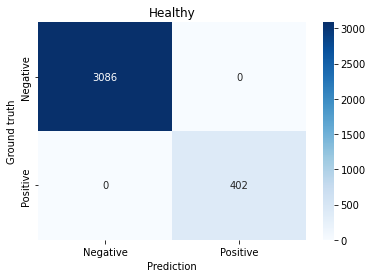

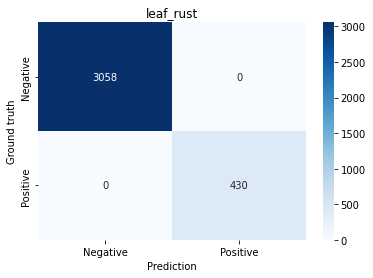

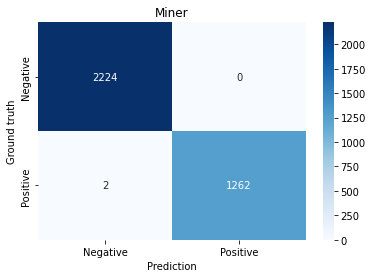

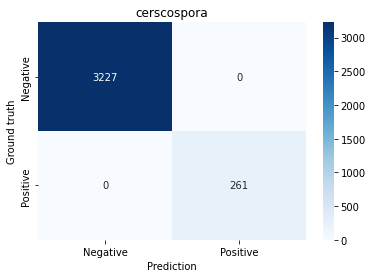

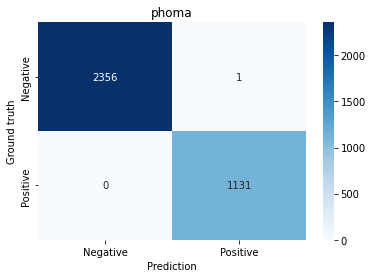

In [ ]:
plot_results(y_test, preds)